# MLP for image classification

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## Normalize Data

In [8]:
print(f"Min: {X_train.min()} Max: {X_train.max()}")

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_test.min(), X_test.max()

Min: 0.0 Max: 1.0


(0.0, 0.003921569)

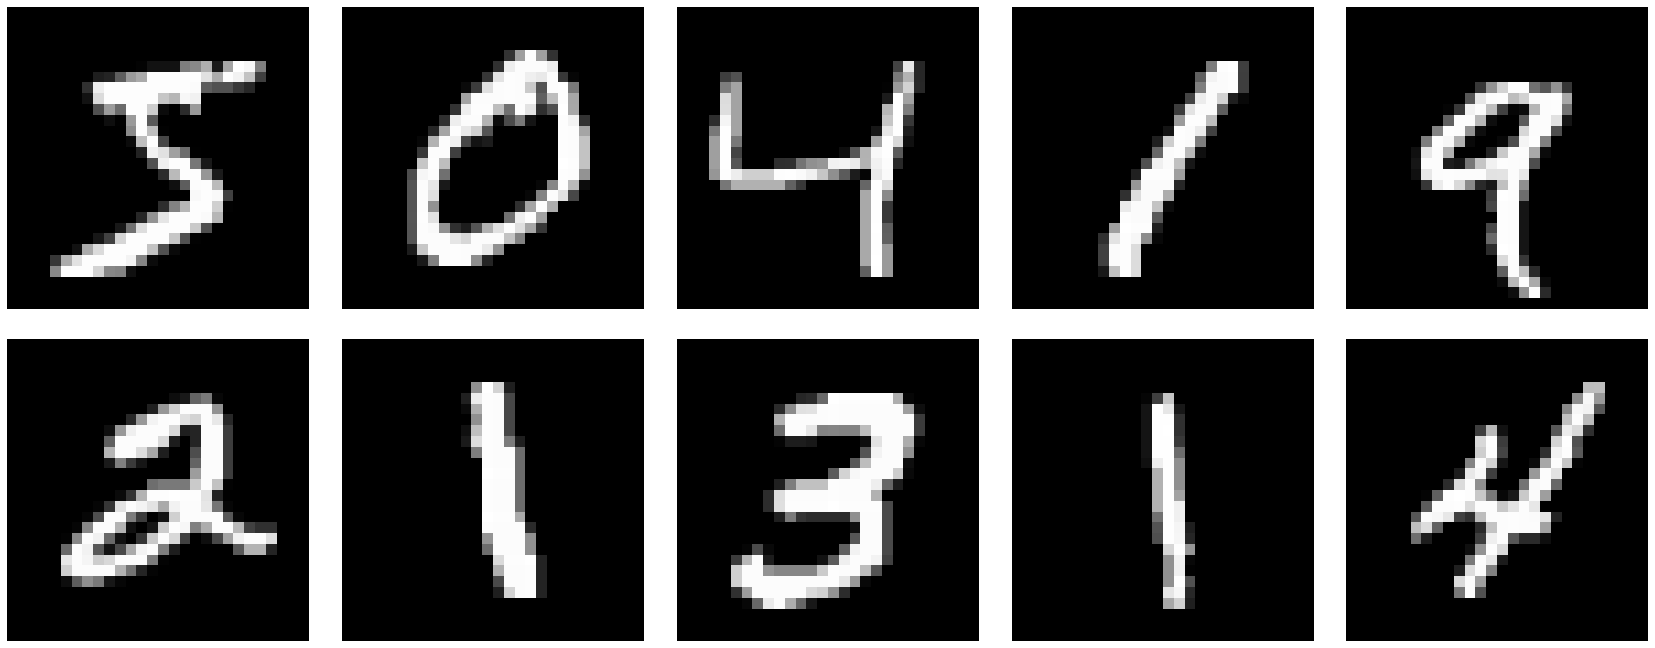

In [19]:
def display_images(data, nrows = 2, ncols = 5, figsize=(30,10)):

    fig, axes = plt.subplots(nrows,ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(X_train[i,:,:], cmap = "gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

## MLP model

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes = None, names = None, activations = []):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape = (28,28), name="input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))

    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return model

model_1 = MLP_model(nodes = [10], names=["Output_layer"], activations=["softmax"])
model_1.summary()

# 28x28 - > 784

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_1.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=0)

In [26]:
metrics = pd.DataFrame(model_1.history.history)
metrics.index = range(len(metrics))
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,2.207263,0.55836,2.111118,0.6856
1,2.029556,0.68570,1.938484,0.7343
2,1.868937,0.72370,1.782225,0.7533
3,1.724405,0.74106,1.641164,0.7781
4,1.594888,0.75908,1.515370,0.7917


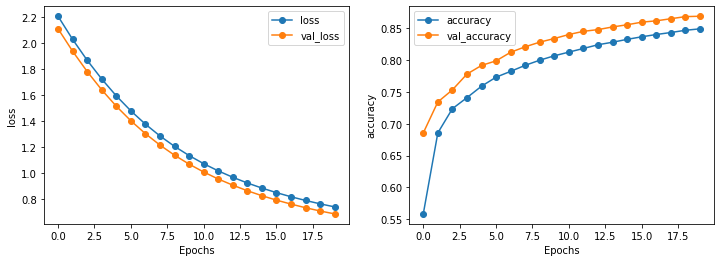

In [27]:
def plot_metrics(df_history, style = "-o"):
    _, axes = plt.subplots(1,2, figsize = (12,4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, col in zip(axes, columns):
        df_history.plot(y=col, xlabel = "Epochs", ylabel = col[0], ax=ax, style =style)

plot_metrics(metrics)

## Hidden layers

In [28]:
model_2 = MLP_model(nodes = [128, 128, 10], activations=["relu", "relu", "softmax"], names = ["Hidde1", "Hidde2", "Output"])
model_2.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidde1 (Dense)              (None, 128)               100480    
                                                                 
 Hidde2 (Dense)              (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_2.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 0.8793 - accuracy: 0.7252 - val_loss: 0.4243 - val_accuracy: 0.8835
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3963 - accuracy: 0.8851 - val_loss: 0.3210 - val_accuracy: 0.9066
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3347 - accuracy: 0.9024 - val_loss: 0.2893 - val_accuracy: 0.9136
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2965 - accuracy: 0.9135 - val_loss: 0.2533 - val_accuracy: 0.9258
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2637 - accuracy: 0.9226 - val_loss: 0.2324 - val_accuracy: 0.9331
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2364 - accuracy: 0.9313 - val_loss: 0.2029 - val_accuracy: 0.9441
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2144 - accuracy: 0.9376 - val_loss: 0.1911 - val_accuracy:

In [33]:
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))

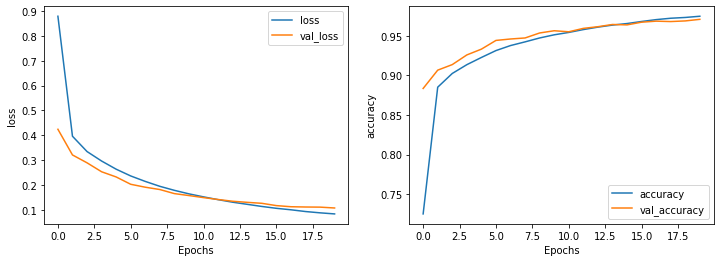

In [34]:
plot_metrics(metrics, style = "-")

In [35]:
model_3 = MLP_model(nodes = [128, 128, 10], activations=["relu", "relu", "softmax"], names = ["Hidde1", "Hidde2", "Output"])
model_3.fit(X_train, y_train, epochs = 5, verbose = 1) # early stopping and train on all data

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7271 - accuracy: 0.7822
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3678 - accuracy: 0.8918
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3079 - accuracy: 0.9101
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2639 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2275 - accuracy: 0.9322


## Predition and evaluation

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.96      0.91      0.93      1032
           3       0.88      0.95      0.91      1010
           4       0.90      0.96      0.93       982
           5       0.96      0.84      0.90       892
           6       0.95      0.96      0.95       958
           7       0.94      0.95      0.94      1028
           8       0.93      0.88      0.90       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



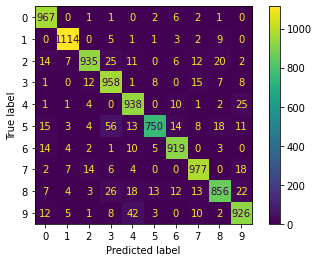

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred= model_3.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Missclassification

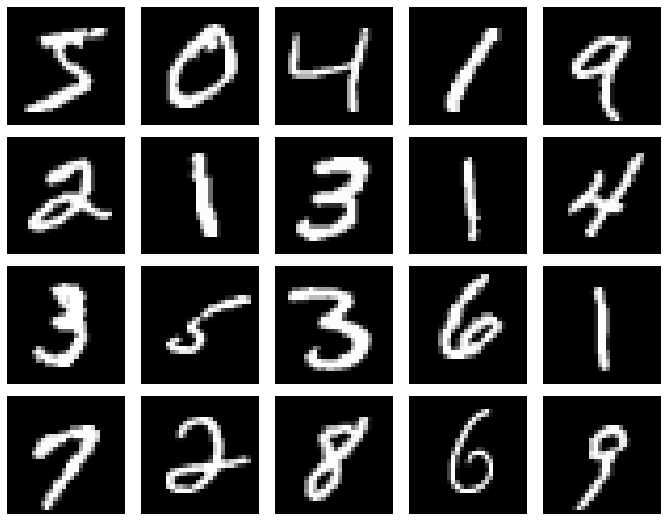

In [41]:
missclassified_indices = np.where(y_pred != y_test)
missclassified_samples = X_test[missclassified_indices]

display_images(missclassified_samples, 4,5, (12,8))